# Data and Analysis Plan: Bitcoin Price Prediction
## Team -10

- Josh Hill (hill.jos@northeastern.edu)
- Jingkai Wang (wang.jingkai@northeastern.edu)
- Lijun Zhang (zhang.liju@northeastern.edu)
- Victor Zheng (zheng.vic@northeastern.edu)

## Central Motivation

The objective of this project is to establish a relationship between Bitcoin's price changes and the daily sentiment about Bitcoin based on Bitcoin related tweets.

Our first dataset, [Cryptocurrency Historical Prices](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory), consists of daily Bitcoin pricing information for the period of 04-29-2013 to 07-06-2021:

- High (highest price coin sold for the day)
- Low (lowest price coin sold for the day)
- Open (price a coin first trades with for that day)
- Closing (price a coin last trades with for that day)
- Volume (# of coins traded for that day)
- Marketcap (the total dollar-value of all the coins OR (price * total supply of bitcoins))
- Date

However, we will only use the `Open`, `Close`, `Volume`, `Date`, and `Marketcap` metrics.

## Data 

![bitcoin](https://i.ibb.co/0hSXXzY/2022-11-04-19-17-40.png)

We will use [Kaggle Bitcoin data](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory) and analyze the bitcoin price over 2013 to 2021. 
![The data shows here](https://i.ibb.co/jz0xGb3/2022-11-04-18-10-48.png)

This is downloaded as an sns file, so we need to use `pandas` and `numpy` to read the file.
- `pd.read_csv()`
- `import pandas as pd`
- `import numpy as np`

For the Bitcoin Data, we only need `Date`, `Open`, `Close`,`Volume` and `Marketcap` column, we use `df.drop()`to delete other data. The column `Date` will be an index and make the analyze more easier.

To make it simpler to manage the data frame as a time series object, the dates column of the dataset will be converted into an index, thus we can sort by the datetime.
- `parse_dates=True`
The `Date` will be an index and can call the `Date` value by `df.index`.

In this way, we change the csv.file only contain the variables we need, and can plot it quickly.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# access the data set from coin_Bitcoin.csv
df = pd.read_csv('coin_Bitcoin.csv', index_col = ['Date'], parse_dates=True)

# Clean the dataset and only remain the data need
df = df.drop(['SNo', 'Name', 'Symbol', 'High', 'Low'], axis=1) 

In [3]:
# show the dataframe
df.head()

,Open,Close,Volume,Marketcap
Date,,,,
2013-04-29 23:59:59,134.444000,144.539993,0.0,1.603769e+09
2013-04-30 23:59:59,144.000000,139.000000,0.0,1.542813e+09
2013-05-01 23:59:59,139.000000,116.989998,0.0,1.298955e+09
2013-05-02 23:59:59,116.379997,105.209999,0.0,1.168517e+09
2013-05-03 23:59:59,106.250000,97.750000,0.0,1.085995e+09


In [4]:
# The index of the Data
df.index

DatetimeIndex(['2013-04-29 23:59:59', '2013-04-30 23:59:59',
               '2013-05-01 23:59:59', '2013-05-02 23:59:59',
               '2013-05-03 23:59:59', '2013-05-04 23:59:59',
               '2013-05-05 23:59:59', '2013-05-06 23:59:59',
               '2013-05-07 23:59:59', '2013-05-08 23:59:59',
               ...
               '2021-06-27 23:59:59', '2021-06-28 23:59:59',
               '2021-06-29 23:59:59', '2021-06-30 23:59:59',
               '2021-07-01 23:59:59', '2021-07-02 23:59:59',
               '2021-07-03 23:59:59', '2021-07-04 23:59:59',
               '2021-07-05 23:59:59', '2021-07-06 23:59:59'],
              dtype='datetime64[ns]', name='Date', length=2991, freq=None)

### Kaggle Bitcoin Tweets Dataset

Our second dataset is [Kaggle Bitcoin Tweets - 16M Tweets](https://www.kaggle.com/datasets/alaix14/bitcoin-tweets-20160101-to-20190329). It has the following data for all tweets inlcuding "Bitcoin" or "BTC" for the period of 04-29-2013 to 07-06-2021:

- id (id of the tweet)
- user (twitter username of the author)
- fullname (fullname of the user)
- url (tweet URL, usually missing)
- timestamp (date and time of tweet)
- replies (number of replies to the tweet)
- likes (number of likes)
- retweets (number of retweets)
- text (text of the tweet)

![The data shows here](https://i.ibb.co/cL2cc81/Screenshot-2022-11-04-194347.png)

This is downloaded as an csv file, so we need to use `pandas` and `numpy` to read the file.
- `pd.read_csv()`
- `import pandas as pd`
- `import numpy as np`

For the Tweet data, we will use the `Timestamp`,`Likes`,`Replies`, `Retweets,` and `Text,` columns, and we will use `df.drop()`to delete other data. The `Timestamp` column will be altered to only include dates, and be used as an index to aid in analysis.

We are currently working on a method of splitting this data set, as it is 4 gigabytes and has proved relatively impossible to work with at this size (it has 16 million rows). Rather than operating on the entire 8 years of data, we will likely work with just a week or month of tweets.

We plan to aggregate like counts, retweets, and replies to tweets along with the tweet's sentiment (positive, negative, neutral) for a given day. This would yield us with a total sentiment score regarding Bitcoin for a certain day. We would then be able to compare this score with the price change from `Open` to `Close` for that day, and using machine learning to determine the impact of Twitter sentiment on Bitcoin's price.

## Visualizations


### Bitcoin Price Over Time

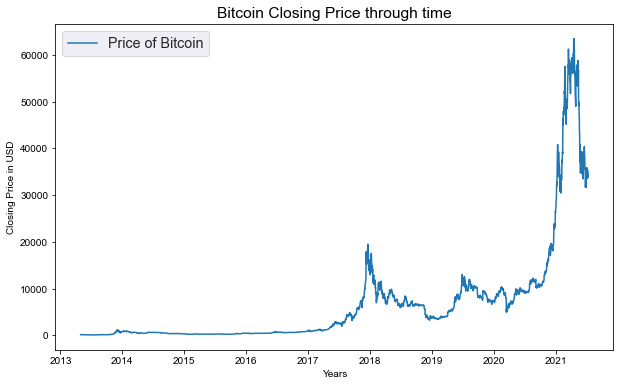

In [5]:
# Make a line plot to make it easier to see any trends of the Bitcoin Closing 
# prices.
plt.plot(df.index, df.loc[:, 'Close'], label = 'Price of Bitcoin')

# set the font size 
sns.set(font_scale=1.3)

# Set the title, labels, and size of the graph
plt.title('Bitcoin Closing Price through time')
plt.xlabel('Years')
plt.ylabel('Closing Price in USD')
plt.gcf().set_size_inches(10, 6)
plt.legend()
plt.show()

**The line graph show that the Bitcoin had positive growth over the past 10 years. Until 2017, though, its growth was very slow. But in mid-2017, there was a huge increase in prices. But that trend has changed in 2018. Prices continued to fall in 2018 and into 2019. The volatility has continued into 2020 and 2021, with even greater gains and losses.**

**The sentiment towards Bitcoin has changed a lot over time, and this is reflected in the massive fluctuations in price. Since Bitcoin is not tied to any real world asset, it's price is based entirely on people's perception of its expected future price.**

### Change in Price Per Day

In [6]:
# calculate the daily % change in Bitcoin's price
percent_price_change = 100 * (df['Open'] - df['Close']) / df['Open']

([<matplotlib.axis.XTick at 0x21f73ee6e50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

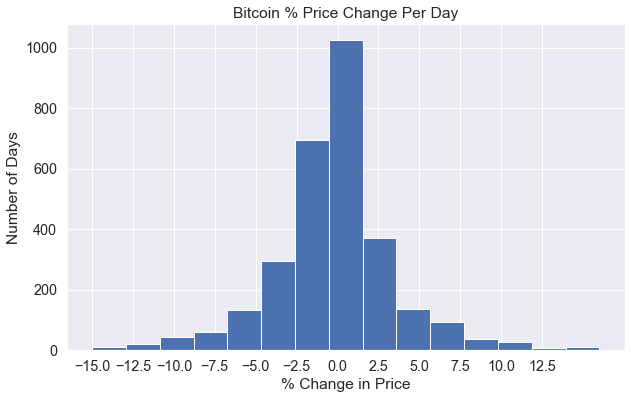

In [7]:
# create a histogram of bitcoin price change per day
# Set title, labels, xticks, and bins
bins = np.linspace(-15, 16, 16)
plt.hist(percent_price_change, bins)
plt.title('Bitcoin % Price Change Per Day')
plt.ylabel('Number of Days')
plt.xlabel('% Change in Price')
plt.gcf().set_size_inches(10, 6)

xticks = np.arange(-15, 15, step=2.5)
plt.xticks(xticks)

In [8]:
# calculate highest price increase
max_gain = percent_price_change.max()

# calculate highest price decrease
max_loss = percent_price_change.min()

print(f'Highest % increase: {max_gain}\nHighest % decrease: {max_loss}')

Highest % increase: 37.1868984110972
Highest % decrease: -41.681102054685205


**The Normal Distribution above shows distribution of Bitcoin's price change per day. While Bitcoin is thought of as an extremely volatile currency, on the vast majority of days it actually experiences relatively minor fluctuations in price.**

**It's worth noting, however, that certain extreme outliers are not shown on this graph. On its worst day, Bitcoin lost about 42% of its value, and on its best day, it gained 37% more value. We may need to take this into account when selecting a timeframe of Bitcoin tweet data, because selecting a timeframe with one of these extreme outliers could result in an inaccurate model.**

## Analysis Plan

We will compare our twitter data with fluctuation in Bitcoin price using a random forest regression, and compute a cross validated R^2 value to see if our model can successfully predict fluctuation in Bitcoin’s price. We will use a regression, rather than a classifier, because Bitcoin price is a continuous variable.

To create our regression, we will first perform a sentiment analysis of all tweets for a given day. We will classify tweets as having positive, negative, or netural sentiment based on their relative volumes of certain keywords, such as buy, sell, good, bad, etc.

Once we have classified our tweets in this manner, we will aggregate the total tweet counts for each sentiment, along with their total likes, retweets, and replies. We will use these metrics as x values in our regression, and the y value will be the % change in Bitcoin's price for each day.

Ideally, we will measure a relatively long stretch of time, as this will give our model more data to train on. However, this may prove difficult due to the sheer volume of Bitcoin related tweets per day and our limited computational power.

Assumptions required for this problem:

- Twitter sentiment is a meaningful indicator of overall Bitcoin sentiment, such that it will be correlated with Bitcoin's price fluctuations.

- We will be able to successfully identify the sentiments of bitcoin related tweets (this will be very difficult to validate)

- Tweet engagement (likes, retweets, and replies) indicates a stronger sentiment in the direction of the given tweet, similar to if more people had posted the same tweet